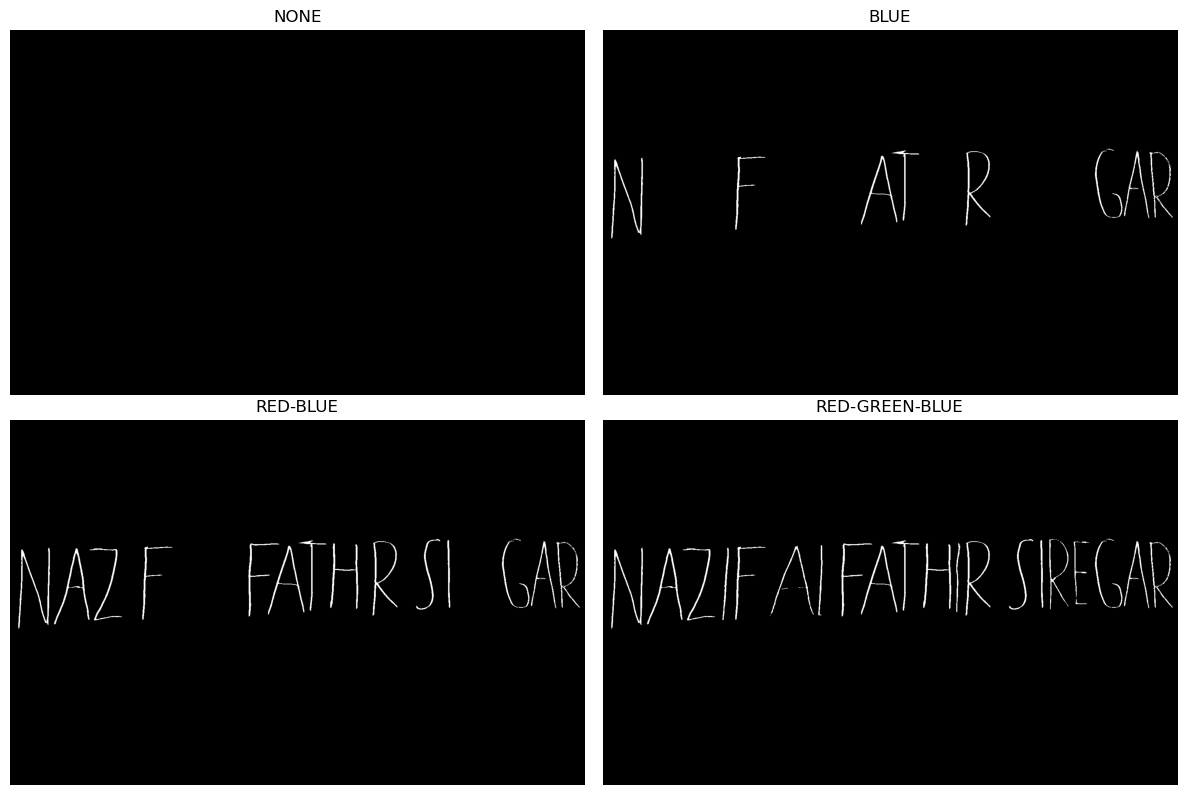

In [7]:
#202331103_Nazif Alfathir Siregar
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("citra1.jpg") 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask_none = np.zeros(img_rgb.shape[:2], dtype="uint8")

lower_blue = np.array([100, 100, 50])
upper_blue = np.array([130, 255, 255])
mask_blue = cv2.inRange(img_hsv, lower_blue, upper_blue)

lower_red1 = np.array([0, 100, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 50])
upper_red2 = np.array([180, 255, 255])
mask_red = cv2.inRange(img_hsv, lower_red1, upper_red1) | cv2.inRange(img_hsv, lower_red2, upper_red2)

mask_rb = cv2.bitwise_or(mask_red, mask_blue)

lower_green = np.array([40, 100, 50])
upper_green = np.array([90, 255, 255])
mask_green = cv2.inRange(img_hsv, lower_green, upper_green)

mask_rgb = cv2.bitwise_or(mask_rb, mask_green)

titles = ["NONE", "BLUE", "RED-BLUE", "RED-GREEN-BLUE"]
masks = [mask_none, mask_blue, mask_rb, mask_rgb]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(masks[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()
